<a href="https://colab.research.google.com/github/CFVV/MSc-assignments/blob/main/2022-2_Computer_Audition/T2_Sinusoids_frequency-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 2: Sinusoides
### Camila Vera Villa

#### Pregunta 8. Síntesis aditiva y Análisis en frecuencia

Utilizando la señal recién creada, en donde la línea melódica está reducida a sinusoides de distintas frecuencias:
* Considere pequeños *segmentos temporales de 2048 muestras* cada uno y calcule la Trasformada de Fourier para cada segmento.
* Encuentre el peak de la transformada e identifique la frecuencia a la que corresponde.
* Grafique la frecuencia de las sinusoides detectada vs tiempo y suba el resultado



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Magíster en Ciencias de la Ingeniería UC/2022-2_Audición_computador/Taller2: Sinusoides/"

In [ ]:
pip install pydub

In [ ]:
from IPython.html.widgets import interact, fixed
from IPython.display import display, Audio
import soundfile as sf
from scipy.io import wavfile
import scipy.fftpack as fourier
import scipy.io.wavfile as waves
import wave
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Beatles melody


Melodía creada en el ejercicio anterior

In [ ]:
display(Audio(path + "linea_melodica_beatles_Camila.wav", rate=44100))

### Parámetros del audio

* **Channels**: número de canales 1 para mono, 2 para stereo audio. En este caso es mono.
* **Sample width**: número de bytes por sample; 1 corresponde a 8-bit, 2 a 16-bit.
* **Frame rate/Sample rate**: frecuencia en Hertz de las muestras usadas (samples)
* **Frame width**: número de bytes para cada “frame”. Un frame contiene un sample por cada canal.
* **Length**: largo del archivo de audio (en milliseconds)
* **Frame count**: número de frames de la muestra
* **Intensity**: sonoridad en dBFS (dB relativo a la sonoridad máxima posible)

fuente: https://towardsdatascience.com/get-to-know-audio-feature-extraction-in-python-a499fdaefe42

In [ ]:
audio_segment = AudioSegment.from_file(path + "linea_melodica_beatles_Camila.wav")
print(f"Channels: {audio_segment.channels}")
print(f"Sample width: {audio_segment.sample_width}")
print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
print(f"Frame width: {audio_segment.frame_width}")
print(f"Length (ms): {len(audio_segment)}")
print(f"Frame count: {audio_segment.frame_count()}")
print(f"Intensity: {audio_segment.dBFS}")

Channels: 1
Sample width: 2
Frame rate (sample rate): 44100
Frame width: 2
Length (ms): 11100
Frame count: 489511.0
Intensity: -3.010478023394847


In [ ]:
linea_melodica = waves.read(path + "linea_melodica_beatles_Camila.wav")[1]

In [ ]:
linea_melodica.shape

(489511,)

Determinar cuántos frames de 2048 existen

In [ ]:
linea_melodica.shape[0]/2048

239.01904296875

Generar batches de 2048

In [ ]:
resampled_melodia = [linea_melodica[i*2048:(i+1)*2048] for i in range(int(linea_melodica.shape[0]/2048))]

In [ ]:
resampled_melodia[:5]

[array([    0,  1538,  3073, ..., 31957, 31582, 31137], dtype=int16),
 array([ 30623,  30042,  29394, ..., -18141, -19402, -20621], dtype=int16),
 array([-21793, -22918, -23992, ..., -19048, -17775, -16463], dtype=int16),
 array([-15115, -13734, -12322, ...,  31695,  32051,  32335], dtype=int16),
 array([32549, 32690, 32760, ..., -3509, -5034, -6549], dtype=int16)]

Función para obtener el peak de cada segmento

In [ ]:
def get_fourier_peak(segment):
    Ts = 0.001                # Definimos un tiempo y frecuencia de muestreo
    Fs = 1/Ts
    gk = fourier.fft(segment) # Calculamos la FFT
    M_gk = abs(gk)            # Calculamos la Magnitud de la FFT
    F = Fs*np.arange(0, len(segment))/len(segment) # Definimos el Vector de Frecuencias
    return F[np.argmax(M_gk)]

Peak de frecuencias

In [ ]:
peak_frecuencies = [get_fourier_peak(segment) for segment in resampled_melodia]

In [ ]:
peak_frecuencies

Gráfica de frecuencia over tiempo

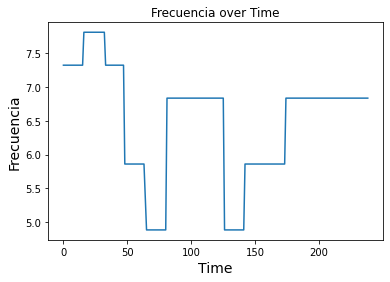

In [ ]:
plt.plot(range(len(peak_frecuencies)), peak_frecuencies)
plt.title('Frecuencia over Time')
plt.xlabel('Time', fontsize='14')
plt.ylabel('Frecuencia', fontsize='14')
plt.show()